In [0]:
#Importing LIbraries
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.layers import MaxPool2D,MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import np_utils
from keras.layers import Dropout
from keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Activation

In [0]:
#Spliting Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#Images is in x_train an x_test
#name is y_train,ytest

In [41]:
#Size 
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
50000 train samples
10000 test samples


In [0]:
#Not adding 4th dimension as its already there in dataset

In [0]:
#Converting to float and then normalising by diving by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [43]:
#OneHot For Y_train and Y_test
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [44]:
#Creating Model 

batch_size=256
epochs=10
num_classes = 10


model = Sequential()



model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))




model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))



#Last Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_45 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [0]:
#ModelCompile 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [46]:
#Training 


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
history=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),steps_per_epoch=10000,
                                     epochs=20,
                                    validation_data=(x_test, y_test))
                        
                        


score = model.model.evaluate(x=x_test,y=y_test,verbose=0)
print('Test_loss:',score[0])
print('Test_accuracy:',score[1])

Epoch 1/20
10000/10000 [==============================] - 938s 94ms/step - loss: 1.5905 - acc: 0.3735 - val_loss: 1.0612 - val_acc: 0.6163
Epoch 2/20
10000/10000 [==============================] - 922s 92ms/step - loss: 1.0419 - acc: 0.6403 - val_loss: 0.8172 - val_acc: 0.7229
Epoch 3/20
10000/10000 [==============================] - 919s 92ms/step - loss: 0.8413 - acc: 0.7208 - val_loss: 0.6861 - val_acc: 0.7700
Epoch 4/20
10000/10000 [==============================] - 921s 92ms/step - loss: 0.7301 - acc: 0.7618 - val_loss: 0.6878 - val_acc: 0.7827
Epoch 5/20
10000/10000 [==============================] - 920s 92ms/step - loss: 0.6563 - acc: 0.7876 - val_loss: 0.5754 - val_acc: 0.8141
Epoch 6/20
10000/10000 [==============================] - 929s 93ms/step - loss: 0.6059 - acc: 0.8047 - val_loss: 0.5728 - val_acc: 0.8233
Epoch 7/20
10000/10000 [==============================] - 921s 92ms/step - loss: 0.5671 - acc: 0.8175 - val_loss: 0.5445 - val_acc: 0.8325
Epoch 8/20
10000/10000 [===

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Test_loss: 0.4249085389614105
Test_accuracy: 0.8659


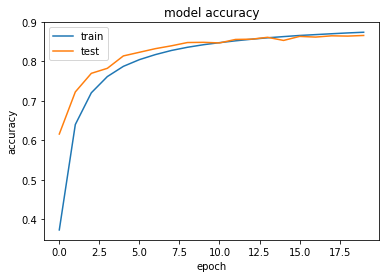

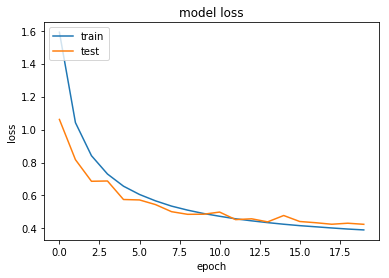

In [47]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('keras.h5')


In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
model.save('cifar10_86%.h5')

     |████████████████████████████████| 993kB 710kB/s 


NameError: ignored